In [1]:
# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper Libraries
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

print(tf.__version__)

2023-10-25 11:08:52.753795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


# Problem statement


Construction of realistic quantum devices requires a good level of understanding and control of quantum noises.

Typically, one could consider two big classes of quantum noises: Markovian (memory-less) and non-Markovian (with memory).

A random pure state gives the initial state:
$$|\psi_0\rangle = 
\begin{pmatrix}
\cos\theta\\
\sin\theta\\
\end{pmatrix},
$$
where $$\theta\in(0,\pi).$$
The Hamiltonian of the system given by
$$
H_S=\frac{\Delta}{2}Z+\Omega X,
$$
where
$$
\Delta\in(-100,100) ~\mathrm{cm}^{-1}, J\in(0,100) ~\mathrm{cm}^{-1}.
$$

We measure the probability of finding the two-level system in the state "up" as a time dependence from $0$ to $500 fs.$
The Markovian cases are generated by the solution of the GKSL (Lindblad) equation, and non-Markovian cases are generated by solving Hierarchical equations of motion (HEOM).

The dataset is composed of a set of Markovian and non-Markovian solutions.

Your task is to write the classifier which is capable of distigushing Markovian and non-Markovian solutions.

# Data uploading

In [2]:
folder = "Data"

nonMark = np.load(folder + "/non-mark-noisy.npy")
Mark = np.load(folder + "/mark-noisy.npy")
time = np.load(folder + "/time.npy")

print('nonMark.shape =', nonMark.shape)
print('Mark.shape =', Mark.shape)
print('time.shape =', time.shape)

nonMark.shape = (1000, 2500)
Mark.shape = (1000, 2500)
time.shape = (2500,)


# Example of evolutions

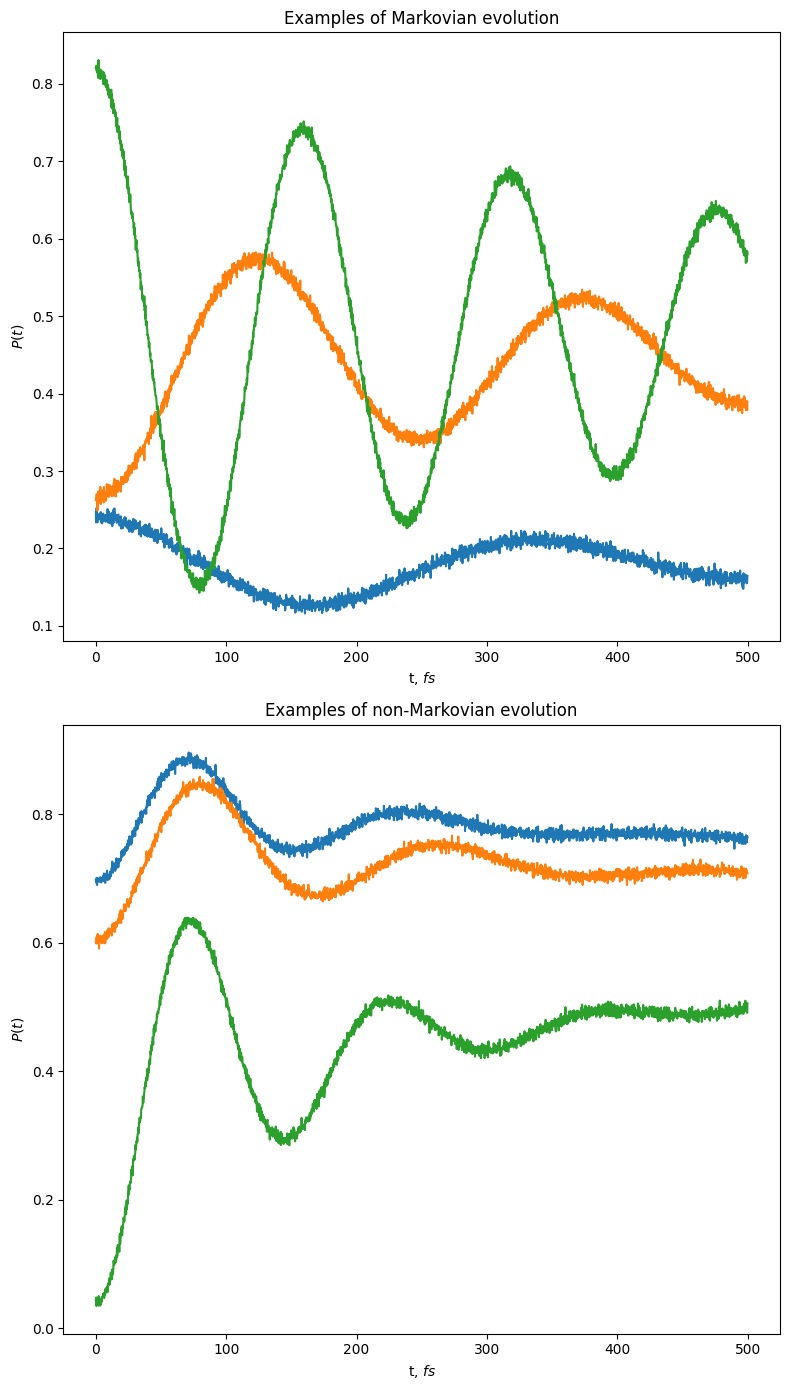

In [3]:
NExamples = 3

# Create a figure and a 2x1 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 14))

# Plot data on the first subplot
for ind in r.choice(range(Mark.shape[0]),NExamples):
    axs[0].plot(time, Mark[ind, :])
axs[0].set_title('Examples of Markovian evolution')
axs[0].set_xlabel(r't, $fs$')
axs[0].set_ylabel(r'$P(t)$')

# Plot data on the second subplot
for ind in r.choice(range(nonMark.shape[0]),NExamples):
    axs[1].plot(time, nonMark[ind, :])

axs[1].set_title('Examples of non-Markovian evolution')
axs[1].set_xlabel(r't, $fs$')
axs[1].set_ylabel(r'$P(t)$')

# Adjust spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


# Let's create combined dataset for Classification task

In [4]:
#Let's agree that class 1 correspond to Markovian evolution and class 0 to non-Markovian one.
dataX = np.vstack((Mark, nonMark))
dataY = np.hstack((np.ones(Mark.shape[0]), np.zeros(Mark.shape[0])))

# split the dataset into a training and test dataset
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

print("There are",X_train.shape[0],"training points with",X_train.shape[1],"features each.")
print("There are",X_test.shape[0],"training points with",X_test.shape[1],"features each.")

There are 1600 training points with 2500 features each.
There are 400 training points with 2500 features each.


# Let's build a simple NN model

In [5]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation function for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X_test)
predictions = np.round(predictions)  # Round predictions to 0 or 1


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.7734 - accuracy: 0.5031
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4869
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5044
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5106
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5075
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5225
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5150
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5144
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5231
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5581
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5562
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5625
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5375
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5362
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5344
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5400
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5244
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5325
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5450
Epoch 93/100
